In [88]:
#Import dependencies
import numpy as np
import pandas as pd
import sqlite3
import argparse
import json
import pprint
import requests
import sys
import urllib
from urllib.error import HTTPError
from urllib.parse import quote
from urllib.parse import urlencode
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
#Assign database file to a variable
# db_file = "Data/crimedata.db"

# Connect to database file
# conn = sqlite3.connect(db_file)


In [3]:
#Query the la crime data table and put into a pandas dataframe
# crime_df = pd.read_sql_query("select * from la_crime_1718;", conn)
# crime_df.head()

In [89]:
crime_df = pd.read_csv('la_crime_small.csv')
crime_df.head()

,DRNumber,DateOccurred,CrimeCode,CrimeCodeDescription,PremiseCode,PremiseDescription
0,170209449,4/21/17,510,VEHICLE - STOLEN,101.0,STREET
1,170206243,2/11/17,510,VEHICLE - STOLEN,101.0,STREET
2,170311599,4/25/17,510,VEHICLE - STOLEN,101.0,STREET
3,170408264,4/7/17,510,VEHICLE - STOLEN,101.0,STREET
4,170508584,4/8/17,510,VEHICLE - STOLEN,101.0,STREET


In [90]:
crime_df['DateOccurred'] = pd.to_datetime(crime_df['DateOccurred'].astype(str), errors='coerce')
crime_df['DateOccurred'] = pd.to_datetime(crime_df['DateOccurred'], format = '%d/%m/%Y %H:%M:%S')

In [91]:
column_1 = crime_df.ix[:,1]

db=pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
#               "dayofyear": column_1.dt.dayofyear,
#               "week": column_1.dt.week,
#               "weekofyear": column_1.dt.weekofyear,
              "dayofweek": column_1.dt.dayofweek,
              "quarter": column_1.dt.quarter,
             })

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [92]:
dataset1=crime_df.drop('DateOccurred',axis=1)
data1=pd.concat([db,dataset1],axis=1)
data1

,year,month,day,dayofweek,quarter,DRNumber,CrimeCode,CrimeCodeDescription,PremiseCode,PremiseDescription
0,2017,4,21,4,2,170209449,510,VEHICLE - STOLEN,101.0,STREET
1,2017,2,11,5,1,170206243,510,VEHICLE - STOLEN,101.0,STREET
2,2017,4,25,1,2,170311599,510,VEHICLE - STOLEN,101.0,STREET
3,2017,4,7,4,2,170408264,510,VEHICLE - STOLEN,101.0,STREET
4,2017,4,8,5,2,170508584,510,VEHICLE - STOLEN,101.0,STREET
5,2017,3,6,0,1,170706824,510,VEHICLE - STOLEN,101.0,STREET
6,2017,5,11,3,2,170114037,510,VEHICLE - STOLEN,101.0,STREET
7,2017,6,6,1,2,170116244,330,BURGLARY FROM VEHICLE,101.0,STREET
8,2017,1,26,3,1,170405181,510,VEHICLE - STOLEN,101.0,STREET
9,2017,2,10,4,1,170206004,510,VEHICLE - STOLEN,101.0,STREET


In [93]:
# data1.dropna(inplace=True)
# data1

In [ ]:
# model_df = data1.drop(['WeaponDescription', 'VictimSex', 'VictimDescent', 'StatusCode', 'StatusDescription',
#                          'Address', 'CrossStreet', 'CrimeCode1', 'CrimeCode2', 'CrimeCode3', 'CrimeCode4', 
#                        'CrimeCodeDescription', 'PremiseDescription', 'AreaName', 'Location','DateReported',], axis=1)
# model_df.dropna()

In [17]:
model_small_df = data1.loc[data1['CrimeCode'].isin(['510'])]
model_small_df.head()

,year,month,day,dayofweek,quarter,DRNumber,CrimeCode,CrimeCodeDescription,PremiseCode,PremiseDescription
0,2017,4,21,4,2,170209449,510,VEHICLE - STOLEN,101.0,STREET
1,2017,2,11,5,1,170206243,510,VEHICLE - STOLEN,101.0,STREET
2,2017,4,25,1,2,170311599,510,VEHICLE - STOLEN,101.0,STREET
3,2017,4,7,4,2,170408264,510,VEHICLE - STOLEN,101.0,STREET
4,2017,4,8,5,2,170508584,510,VEHICLE - STOLEN,101.0,STREET


In [18]:
month = model_small_df.groupby('month')
month = month['CrimeCode'].count()
month = month.reset_index()
month.head()

,month,CrimeCode
0,1,1193
1,2,927
2,3,948
3,4,938
4,5,990


In [19]:
X = month.month.values.reshape(-1, 1)
y = month.CrimeCode.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (12, 1) (12, 1)


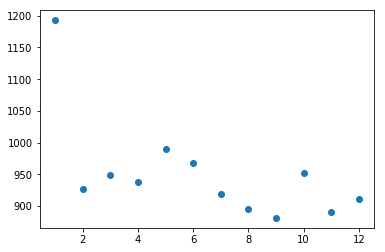

In [20]:
plt.scatter(X, y)

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [22]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-14.04195804]]
y-axis intercept:  [1042.27272727]


In [24]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)

Text(0.5,0,'Month')

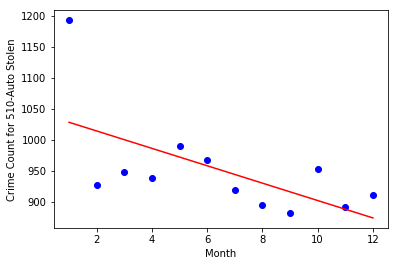

In [25]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.ylabel('Crime Count for 510-Auto Stolen')
plt.xlabel('Month')

In [26]:
week = model_small_df.groupby('dayofweek')
week = week['CrimeCode'].count()
week = week.reset_index()
week.head()

,dayofweek,CrimeCode
0,0,1581
1,1,1502
2,2,1592
3,3,1624
4,4,1792


In [27]:
X = week.dayofweek.values.reshape(-1, 1)
y = week.CrimeCode.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (7, 1) (7, 1)


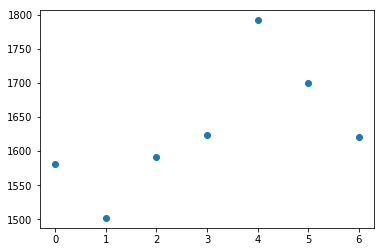

In [28]:
plt.scatter(X, y)

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[25.57142857]]
y-axis intercept:  [1553.57142857]


Text(0.5,0,'Week')

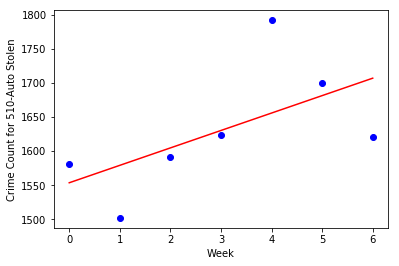

In [30]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.ylabel('Crime Count for 510-Auto Stolen')
plt.xlabel('Week')

In [31]:
#other crime code example

In [40]:
model_210_df = data1.loc[data1['CrimeCode'].isin(['210'])]
model_210_df.head()

,year,month,day,dayofweek,quarter,DRNumber,CrimeCode,CrimeCodeDescription,PremiseCode,PremiseDescription
73,2017,1,29,6,1,170100574,210,ROBBERY,102.0,SIDEWALK
75,2017,1,29,6,1,170100579,210,ROBBERY,101.0,STREET
97,2017,2,21,1,1,170100626,210,ROBBERY,252.0,"COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, E..."
100,2017,2,22,2,1,170100631,210,ROBBERY,102.0,SIDEWALK
102,2017,2,24,4,1,170100634,210,ROBBERY,516.0,NaN


In [41]:
month = model_210_df.groupby('month')
month = month['CrimeCode'].count()
month = month.reset_index()
month.head()

,month,CrimeCode
0,1,692
1,2,561
2,3,556
3,4,591
4,5,638


In [42]:
X = month.month.values.reshape(-1, 1)
y = month.CrimeCode.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (12, 1) (12, 1)


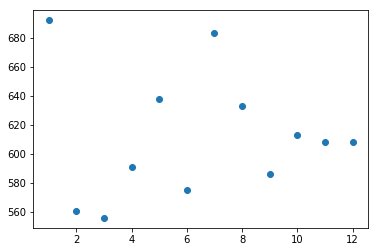

In [43]:
plt.scatter(X, y)

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-0.11888112]]
y-axis intercept:  [612.77272727]


Text(0.5,0,'Month')

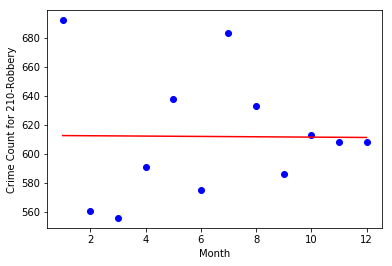

In [45]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.ylabel('Crime Count for 210-Robbery')
plt.xlabel('Month')

In [46]:
week = model_210_df.groupby('dayofweek')
week = week['CrimeCode'].count()
week = week.reset_index()
week.head()

,dayofweek,CrimeCode
0,0,1077
1,1,979
2,2,972
3,3,997
4,4,1047


In [47]:
X = week.dayofweek.values.reshape(-1, 1)
y = week.CrimeCode.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (7, 1) (7, 1)


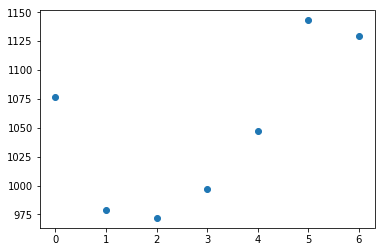

In [48]:
plt.scatter(X, y)

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[19.96428571]]
y-axis intercept:  [989.25]


Text(0.5,0,'Week')

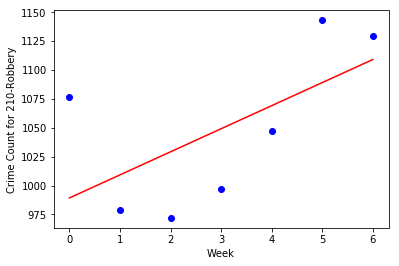

In [50]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.ylabel('Crime Count for 210-Robbery')
plt.xlabel('Week')

In [57]:
model_small_df = data1.loc[data1['CrimeCode'].isin(['510'])]
model_small_df.head()

,year,month,day,dayofweek,quarter,DRNumber,CrimeCode,CrimeCodeDescription,PremiseCode,PremiseDescription
0,2017,4,21,4,2,170209449,510,VEHICLE - STOLEN,101.0,STREET
1,2017,2,11,5,1,170206243,510,VEHICLE - STOLEN,101.0,STREET
2,2017,4,25,1,2,170311599,510,VEHICLE - STOLEN,101.0,STREET
3,2017,4,7,4,2,170408264,510,VEHICLE - STOLEN,101.0,STREET
4,2017,4,8,5,2,170508584,510,VEHICLE - STOLEN,101.0,STREET


In [69]:
model_small_df = model_small_df[['DRNumber','CrimeCode','PremiseCode']]

In [70]:
model_small_df = model_small_df.fillna(0)
model_small_df.reset_index()
model_small_df.head()

,DRNumber,CrimeCode,PremiseCode
0,170209449,510,101.0
1,170206243,510,101.0
2,170311599,510,101.0
3,170408264,510,101.0
4,170508584,510,101.0


In [71]:
model_small_df['DRNumber'] = model_small_df['DRNumber'].apply(pd.to_numeric, errors='coerce')

model_small_df['CrimeCode'] = model_small_df['CrimeCode'].apply(pd.to_numeric, errors='coerce')

model_small_df['PremiseCode'] = model_small_df['PremiseCode'].apply(pd.to_numeric, errors='coerce')


In [72]:
model_small_df = model_small_df.fillna(0)
model_small_df.reset_index()
model_small_df.head(5)

,DRNumber,CrimeCode,PremiseCode
0,170209449,510,101.0
1,170206243,510,101.0
2,170311599,510,101.0
3,170408264,510,101.0
4,170508584,510,101.0


In [73]:
X = model_small_df.drop("PremiseCode", axis=1)
y = model_small_df["PremiseCode"]
print(X.shape, y.shape)

(11412, 2) (11412,)


In [74]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [75]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

classifier.fit(X_train, y_train)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

Training Data Score: 0.703236359387779
Testing Data Score: 0.6929547844374343
First 10 Predictions:   [101. 101. 101. 101. 101. 101. 101. 101. 101. 101.]
First 10 Actual labels: [101.0, 101.0, 101.0, 101.0, 108.0, 101.0, 101.0, 101.0, 101.0, 101.0]


In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20)
rf = rf.fit(X, y)
rf.score(X, y)

0.8838065194532071

In [77]:
importances = rf.feature_importances_
importances

array([1., 0.])

In [78]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50]}
grid = GridSearchCV(classifier, param_grid, verbose=3)

In [79]:
grid.fit(X, y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=1 .............................................................
[CV] .................... C=1, score=0.6979057591623037, total=   0.1s
[CV] C=1 .............................................................


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .................... C=1, score=0.7011312812417785, total=   0.1s
[CV] C=1 .............................................................
[CV] .................... C=1, score=0.7029807438670536, total=   0.1s
[CV] C=5 .............................................................
[CV] .................... C=5, score=0.6979057591623037, total=   0.1s
[CV] C=5 .............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .................... C=5, score=0.7011312812417785, total=   0.1s
[CV] C=5 .............................................................
[CV] .................... C=5, score=0.7029807438670536, total=   0.1s
[CV] C=10 ............................................................
[CV] ................... C=10, score=0.6979057591623037, total=   0.1s
[CV] C=10 ............................................................
[CV] ................... C=10, score=0.7011312812417785, total=   0.1s
[CV] C=10 ............................................................
[CV] ................... C=10, score=0.7029807438670536, total=   0.1s
[CV] C=50 ............................................................
[CV] ................... C=50, score=0.6979057591623037, total=   0.1s
[CV] C=50 ............................................................
[CV] ................... C=50, score=0.7011312812417785, total=   0.1s
[CV] C=50 ............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 5, 10, 50]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=3)

In [80]:
print(grid.best_params_)

{'C': 1}


In [81]:
print(grid.best_score_)

0.7006659656501928


In [82]:
predictions = grid.predict(X)

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y, predictions,
                            target_names=['101', '108', '123', '707', '103', '208', '104', '158', '710', '301', '106',
                                          '121', '142', '217', '151', '109', '110', '116', '118', '203', '102',
                                          '107', '122', '255', '705', '502', '213', '501', '416', '704', '503', '105',
                                          '119', '202']))

             precision    recall  f1-score   support

        101       0.70      1.00      0.82      7996
        108       0.00      0.00      0.00         4
        123       0.00      0.00      0.00       102
        707       0.00      0.00      0.00       445
        103       0.00      0.00      0.00         1
        208       0.00      0.00      0.00         2
        104       0.00      0.00      0.00         1
        158       0.00      0.00      0.00      2110
        710       0.00      0.00      0.00         2
        301       0.00      0.00      0.00         2
        106       0.00      0.00      0.00         4
        121       0.00      0.00      0.00        15
        142       0.00      0.00      0.00         1
        217       0.00      0.00      0.00        21
        151       0.00      0.00      0.00         1
        109       0.00      0.00      0.00       149
        110       0.00      0.00      0.00         2
        116       0.00      0.00      0.00   

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [84]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1000)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1000, p=2,
           weights='uniform')

In [85]:
knn.score(X_test,y_test)

0.6929547844374343

In [86]:
knn.score(X_train,y_train)

0.703236359387779

k: 1, Train/Test Score: 1.000/0.571
k: 3, Train/Test Score: 0.757/0.644
k: 5, Train/Test Score: 0.730/0.656
k: 7, Train/Test Score: 0.716/0.677
k: 9, Train/Test Score: 0.711/0.678
k: 11, Train/Test Score: 0.710/0.680
k: 13, Train/Test Score: 0.708/0.685
k: 15, Train/Test Score: 0.707/0.686
k: 17, Train/Test Score: 0.706/0.690
k: 19, Train/Test Score: 0.706/0.691


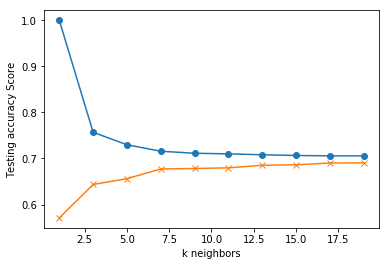

In [87]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()